<a href="https://colab.research.google.com/github/gautamprakash2102/Lung-Cancer-Classification/blob/main/WSI_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing Slide


In [ ]:
!sudo apt-get install openslide-tools
!sudo apt-get install python-openslide
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 0s (508 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf

In [ ]:
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
slide = openslide.open_slide("/content/drive/MyDrive/SRFP/TCGA-97-7938-01A-01-TS1.b8ccb4a5-0bdc-4a7c-92ef-a41bcec791a1.svs")

In [ ]:
slide_props = slide.properties
print(slide_props)

<_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'resc3-dsr2', 'aperio.Date': '03/18/14', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-49-AARQ-11A-02-TS2', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '153496', 'aperio.Left': '14.609409', 'aperio.LineAreaXOffset': '0.020965', 'aperio.LineAreaYOffset': '-0.004897', 'aperio.LineCameraSkew': '-0.000153', 'aperio.MPP': '0.5034', 'aperio.OriginalHeight': '29629', 'aperio.OriginalWidth': '48768', 'aperio.Parmset': 'GOG136 on O: Drive', 'aperio.ScanScope ID': 'SS1764CNTLR', 'aperio.StripeWidth': '2032', 'aperio.Time': '08:06:23', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Title': 'TCGA-49-AARQ-11A-02-TS2', 'aperio.Top': '20.040720', 'aperio.User': '92ea698f-7ff8-4e13-adb8-d131507020aa', 'openslide.comment': 'Aperio Image Library v12.0.11 \r\n48768x29629 [0,100 47827x29529] (240x240) JPEG/RGB Q=30|AppMag = 20|StripeWid

In [ ]:
print(slide.level_downsamples)

(1.0, 4.000193192341937, 16.00294086447054)


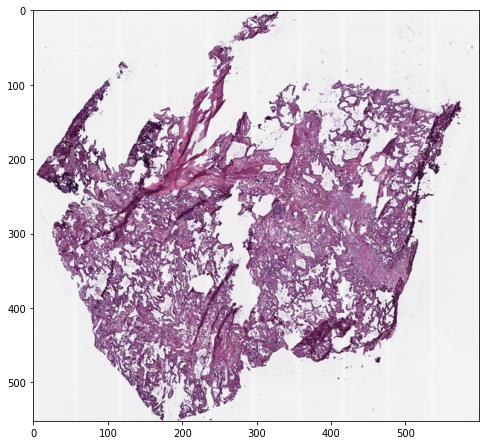

In [ ]:
slide_thumb_600 = slide.get_thumbnail(size=(600, 600))
slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_600_np)


In [ ]:
slide_dims = slide.dimensions
print(slide_dims)

(17927, 18845)


In [ ]:
dims = slide.level_dimensions
num_levels = len(dims)
print("Number of levels in this image are:", num_levels)
print("Dimensions of various levels in this image are:", dims)


In [ ]:
level2_img = slide.read_region((0,0), 1, dims[1])
level2_img_RGB = level2_img.convert('RGB')
level2_img_np = np.array(level2_img_RGB)
plt.imshow(level2_img_np)

In [ ]:
SCALE_FACTOR = 32
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)
print(best_level)

In [ ]:
from openslide.deepzoom import DeepZoomGenerator

In [ ]:
tiles = DeepZoomGenerator(slide, tile_size = 256, overlap = 0, limit_bounds = False)

In [ ]:
print(tiles.level_tiles[15])

(71, 74)


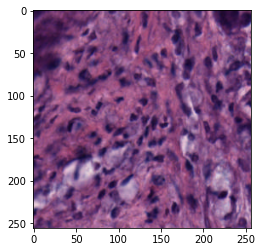

In [ ]:
single_tile = tiles.get_tile(15, (35, 37))
single_tile_RGB = single_tile.convert('RGB')
single_tile_np = np.array(single_tile_RGB)
plt.imshow(single_tile_np)

#Extracting Tiles


In [ ]:
cols, rows = tiles.level_tiles[14]
count = 0
import os
tile_dir = "/content/drive/MyDrive/SRFP/Tumor_tiles_512"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        temp_tile = tiles.get_tile(14, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
          print("Now saving tile with title: ", tile_name)
          plt.imsave(tile_name + ".png", temp_tile_np)
          count= count+1
print(count)

#Working with HistomicsTK

In [ ]:
!pip install histomicstk --find-links https://girder.github.io/large_image_wheels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://girder.github.io/large_image_wheels
     |████████████████████████████████| 536 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 176 kB 46.1 MB/s 
     |████████████████████████████████| 4.7 MB 30.5 MB/s 
     |████████████████████████████████| 28.7 MB 2.0 MB/s 
     |████████████████████████████████| 44 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 40.3 MB 1.5 MB/s 
     |████████████████████████████████| 14.6 MB 30.7 MB/s 
     |████████████████████████████████| 78.6 MB 9.4 kB/s 
     |████████████████████████████████| 1.5 MB 54.5 MB/s 
     |████████████████████████████████| 4.9 MB 34.6 MB/s 
     |████████████████████████████████| 66 kB 4.9 MB/s 
     |████████████████████████████████| 2.9 MB 36.6 MB/s 
     |█████████████████████████████

In [ ]:
from __future__ import print_function
import os

import histomicstk as htk
import scipy as sp

import os

import numpy as np

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
print('stain_color_map:', stain_color_map, sep='\n')

stains = ['hematoxylin',
          'eosin',
          'null']

W = np.array([stain_color_map[st] for st in stains]).T

stain_color_map:
{'hematoxylin': [0.65, 0.7, 0.29], 'eosin': [0.07, 0.99, 0.11], 'dab': [0.27, 0.57, 0.78], 'null': [0.0, 0.0, 0.0]}


In [ ]:
import os

directory = '/content/drive/MyDrive/SRFP/Tumor_tiles_512'

path = '/content/drive/MyDrive/SRFP/Normalised_Images_512'

ref_image_file = ('https://data.kitware.com/api/v1/file/'
                  '57718cc28d777f1ecd8a883c/download')
im_reference = skimage.io.imread(ref_image_file)[:, :, :3]

mean_ref, std_ref = htk.preprocessing.color_conversion.lab_mean_std(im_reference)

for x in os.listdir(directory):
  img_path = os.path.join(directory, x)
  img = skimage.io.imread(img_path)[:, :, :3]
  img_nmzd = htk.preprocessing.color_normalization.reinhard(img, mean_ref, std_ref)
  filename = os.path.splitext(x)[0]
  img_nmzd_path = os.path.join(path, filename)
  plt.imsave(img_nmzd_path + "_nmzd.png", img_nmzd)
  print(filename + " : saved")

In [ ]:
directory = '/content/drive/MyDrive/SRFP/Normalised_Images_2'
import os
path1 = '/content/drive/MyDrive/SRFP/Hematoxylin_2'
path2 = '/content/drive/MyDrive/SRFP/Eosin_2'
for x in os.listdir(directory):
  img_path = os.path.join(directory, x)
  img = skimage.io.imread(img_path)[:, :, :3]
  img_dec= htk.preprocessing.color_deconvolution.color_deconvolution(img, W)
  filename = os.path.splitext(x)[0]
  img1_path = os.path.join(path1, filename)
  img2_path = os.path.join(path2, filename)
  plt.imsave(img1_path + "_hem.png", img_dec.Stains[:, :, 0], cmap='gray')
  plt.imsave(img2_path + "_eos.png", img_dec.Stains[:, :, 1], cmap='gray')
  print(filename + " : saved")

In [ ]:
foreground_threshold = 60
min_radius = 3
max_radius = 10
local_max_search_radius = 10
min_nucleus_area = 10
count = 0

path = '/content/drive/MyDrive/SRFP/Normalised_Images_512'

tar_dir = '/content/drive/MyDrive/CNN_Model_2/Tumor'
for x in os.listdir(path):
  img_path = os.path.join(path, x)
  img_nmzd = skimage.io.imread(img_path)[:, :, :3]
  img_dec= htk.preprocessing.color_deconvolution.color_deconvolution(img_nmzd, W)
  img = img_dec.Stains[:, :, 0]
  im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(
    img < foreground_threshold)
  im_log_max, im_sigma_max = htk.filters.shape.cdog(
    img, im_fgnd_mask,
    sigma_min=min_radius * np.sqrt(2),
    sigma_max=max_radius * np.sqrt(2))
  im_nuclei_seg_mask, seeds, maxima = htk.segmentation.nuclear.max_clustering(
    im_log_max, im_fgnd_mask, local_max_search_radius)
  im_nuclei_seg_mask = htk.segmentation.label.area_open(
    im_nuclei_seg_mask, min_nucleus_area).astype(np.int)
  if len(skimage.measure.regionprops(im_nuclei_seg_mask)) > 240 :
    filename = os.path.splitext(x)[0]
    tar_path = os.path.join(tar_dir, filename)
    plt.imsave(tar_path+ "_seg.png", skimage.color.label2rgb(im_nuclei_seg_mask, img, bg_label=0))
    count = count+1
    print(x, " : saved")
print(count)


In [ ]:
count = 0
for x in os.listdir('/content/drive/MyDrive/CNN_Model/Normal'):
  count = count + 1
print(count)

1216


In [ ]:
count = 0
for x in os.listdir('/content/drive/MyDrive/CNN_Model/Tumor'):
  count = count + 1
print(count)

1034


In [ ]:
count = 0
for x in os.listdir('/content/drive/MyDrive/CNN_Model_2/Normal'):
  count = count + 1
print(count)

229


In [ ]:
count = 0
for x in os.listdir('/content/drive/MyDrive/CNN_Model_2/Tumor'):
  count = count + 1
print(count)

257


In [ ]:
def WSI_preprocess(img, Type, folder):
  slide = openslide.open_slide(img)
  tiles = DeepZoomGenerator(slide, tile_size = 256, overlap = 0, limit_bounds = False)
  levels = tiles.level_count
  cols, rows = tiles.level_tiles[levels-1]

  ref_image_file = ('https://data.kitware.com/api/v1/file/'
                  '57718cc28d777f1ecd8a883c/download')
  im_reference = skimage.io.imread(ref_image_file)[:, :, :3]

  mean_ref, std_ref = htk.preprocessing.color_conversion.lab_mean_std(im_reference)

  stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map

  stains = ['hematoxylin',
            'eosin',
            'null']

  W = np.array([stain_color_map[st] for st in stains]).T

  foreground_threshold = 60
  min_radius = 3
  max_radius = 10
  local_max_search_radius = 10
  min_nucleus_area = 10

  count = 0
  import os
  tile_dir = folder
  PID = os.path.basename(img).split(".")[0]
  for row in range(rows):
      for col in range(cols):
          filename = os.path.join(tile_dir, PID + '_'+ Type +'_%d_%d' % (col, row))
          temp_tile = tiles.get_tile(levels-1, (col, row))
          temp_tile_RGB = temp_tile.convert('RGB')
          temp_tile_np = np.array(temp_tile_RGB)
          if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
            img_nmzd = htk.preprocessing.color_normalization.reinhard(temp_tile_np, mean_ref, std_ref)
            img_dec= htk.preprocessing.color_deconvolution.color_deconvolution(img_nmzd, W)
            img = img_dec.Stains[:, :, 0]
            im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(
              img < foreground_threshold)
            im_log_max, im_sigma_max = htk.filters.shape.cdog(
              img, im_fgnd_mask,
              sigma_min=min_radius * np.sqrt(2),
              sigma_max=max_radius * np.sqrt(2))
            im_nuclei_seg_mask, seeds, maxima = htk.segmentation.nuclear.max_clustering(
              im_log_max, im_fgnd_mask, local_max_search_radius)
            im_nuclei_seg_mask = htk.segmentation.label.area_open(
              im_nuclei_seg_mask, min_nucleus_area).astype(np.int)
            if len(skimage.measure.regionprops(im_nuclei_seg_mask)) > 60 :
              tar_path = os.path.join(folder, filename)
              print("Saving : "+ tar_path)
              plt.imsave(tar_path+ "_seg.png", skimage.color.label2rgb(im_nuclei_seg_mask, img, bg_label=0))
              count= count+1
  print(count)

In [ ]:
img = "/content/drive/MyDrive/SRFP/TCGA-69-7979-01A-01-TS1.b8e1a78d-e339-4280-94a7-5b94106890c0.svs"
Type = "C"
folder = "/content/drive/MyDrive/SRFP/New_Tumour"
WSI_preprocess(img, Type, folder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_27_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_28_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_29_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_30_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_31_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_32_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_33_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_34_12
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_24_13
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_25_13
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_26_13
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-69-7979-01A-01-TS1_C_27_13
Saving : /content/drive/MyDrive/SRFP/New

In [ ]:
img = "/content/drive/MyDrive/SRFP/TCGA-99-8033-01A-01-TS1.c9f52107-d2d5-4e7d-b30a-3d1d6cf5a5f6.svs"
Type = "C"
folder = "/content/drive/MyDrive/SRFP/New_Tumour"
WSI_preprocess(img, Type, folder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_21_0
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_29_0
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_30_0
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_31_0
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_21_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_22_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_23_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_27_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_28_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_29_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_30_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA-99-8033-01A-01-TS1_C_31_1
Saving : /content/drive/MyDrive/SRFP/New_Tumour/TCGA

In [ ]:
img = "/content/drive/MyDrive/SRFP/TCGA-49-4506-11A-01-TS1.1c918b9d-893a-45ad-b4ad-6ace64a92a8b.svs"
Type = "N"
folder = "/content/drive/MyDrive/SRFP/New_Normal"
WSI_preprocess(img, Type, folder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_30_6
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_30_7
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_17_8
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_20_8
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_25_8
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_30_8
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_15_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_16_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_17_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_19_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_20_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA-49-4506-11A-01-TS1_N_21_9
Saving : /content/drive/MyDrive/SRFP/New_Normal/TCGA

In [ ]:
img = "/content/drive/MyDrive/SRFP/TCGA-49-AARQ-11A-02-TS2.7047AE2E-2B53-4E40-8CBA-7B9C28AFDB4C.svs"
Type = "N"
folder = "/content/drive/MyDrive/SRFP/New_Normal"
WSI_preprocess(img, Type, folder)

In [ ]:
img = "/content/drive/MyDrive/SRFP/TCGA-97-7938-01A-01-TS1.b8ccb4a5-0bdc-4a7c-92ef-a41bcec791a1.svs"
Type = "C"
folder = "/content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour"
WSI_preprocess(img, Type, folder)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_40_1
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_40_2
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_40_3
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_31_7
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_32_7
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_33_7
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_33_8
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_33_10
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_32_11
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_Tumour/TCGA-97-7938-01A-01-TS1_C_32_12
Saving : /content/drive/MyDrive/CNN_Model/Test_Data/New_T